# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import requests
import scipy.stats as st
import pprint as pp
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [83]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) ## test with size of 5 vs 1500 - change back!!
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) ## test with size of 5 vs 1500 - change back!!
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total = len(cities)
print(f'total cities: {total}')

total cities: 653


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [84]:

# lists to construct dataframe
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# elements of query
url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    'appid': weather_api_key,
    'units': 'imperial'
}

# set count value to track number of records processed
count = 1

print(f'Beginning data retrieval')
print(f'------------------------------------------')

# iterate over list of cities
for city in cities:
    
    # set search city for API
    params['q'] = city
    
    # API call to openweathermap.org
    response = requests.get(url, params=params).json()
    
    # populate lists with API data for each city
    try:
        city_name.append(response['name'])
        print(f'Processing record {count} of {total} | {city}')
        try:
            lat.append(response.get('coord').get('lat'))
            lng.append(response.get('coord').get('lon'))
            max_temp.append(response.get('main').get('temp_max'))
            humidity.append(response.get('main').get('humidity'))
            cloudiness.append(response.get('clouds').get('all'))
            wind_speed.append(response.get('wind').get('speed'))
            country.append(response.get('sys').get('country'))
            date.append(response.get('dt'))
        except:
            print(Exception)
    except(KeyError):
        print('Missing city. Skipping....')
    
    # increment count of records being processed
    count += 1

# create dictionary from populated lists
dict = {
    'City': city_name,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}

# convert dictionary to dataframe
cities_df = pd.DataFrame(dict)

Beginning data retrieval
------------------------------------------
Processing record 1 of 653 | hilo
Processing record 2 of 653 | mar del plata
Processing record 3 of 653 | ushuaia
Processing record 4 of 653 | mataura
Processing record 5 of 653 | zemio
Processing record 6 of 653 | albany
Processing record 7 of 653 | lerwick
Processing record 8 of 653 | iqaluit
Processing record 9 of 653 | ganzhou
Processing record 10 of 653 | puerto ayora
Processing record 11 of 653 | hermanus
Missing city. Skipping....
Processing record 13 of 653 | yellowknife
Processing record 14 of 653 | saint george
Processing record 15 of 653 | ancud
Missing city. Skipping....
Processing record 17 of 653 | coaticook
Processing record 18 of 653 | hobart
Processing record 19 of 653 | bilibino
Processing record 20 of 653 | bow island
Processing record 21 of 653 | miles city
Processing record 22 of 653 | bengkulu
Processing record 23 of 653 | havoysund
Processing record 24 of 653 | bredasdorp
Processing record 25 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [85]:
# display dataframe
cities_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
603,Teahupoo,-17.8333,-149.2667,72.25,77,14,9.53,PF,1666487373
604,Broken Hill,-31.9500,141.4333,61.45,88,100,6.89,AU,1666487374
605,Suntar,62.1444,117.6319,24.94,95,77,4.85,RU,1666487374
606,Mandalgovi,45.7625,106.2708,37.94,36,5,6.08,MN,1666487374
607,Baltasi,56.3462,50.2062,28.26,80,70,7.49,RU,1666487375


In [86]:
# describe numeric data
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,6.080000e+02
mean,20.671745,15.777732,60.406990,73.909539,60.120066,7.973438,1.666487e+09
std,32.420962,90.474277,18.780186,19.182640,41.295421,5.765204,8.103242e+01
min,-54.800000,-175.200000,1.530000,13.000000,0.000000,0.000000,1.666487e+09
25%,-3.756375,-67.164400,48.245000,65.000000,13.000000,3.595000,1.666487e+09
50%,22.918450,20.309700,65.280000,79.000000,76.000000,6.500000,1.666487e+09
75%,47.939050,97.280700,75.545000,88.000000,100.000000,10.600000,1.666487e+09
max,78.218600,178.416700,101.320000,100.000000,100.000000,36.640000,1.666487e+09


In [87]:
# save city data to csv
cities_df.to_csv('output_data/cities_weather.csv',index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [88]:
# filter for cities with humidity greater than zero and save to a dataframe
humidity_error_df = cities_df.loc[cities_df['Humidity'] > 100]
print(f'Number of cities with humidity value higher than 100%: {len(humidity_error_df)}')

Number of cities with humidity value higher than 100%: 0


In [89]:
#  Get the indices of cities that have humidity over 100%.
h_err_index = humidity_error_df.index.to_list()
h_err_index


[]

In [90]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data = cities_df.loc[set(cities_df.index) - set(h_err_index)]
clean_city_data.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
603,Teahupoo,-17.8333,-149.2667,72.25,77,14,9.53,PF,1666487373
604,Broken Hill,-31.9500,141.4333,61.45,88,100,6.89,AU,1666487374
605,Suntar,62.1444,117.6319,24.94,95,77,4.85,RU,1666487374
606,Mandalgovi,45.7625,106.2708,37.94,36,5,6.08,MN,1666487374
607,Baltasi,56.3462,50.2062,28.26,80,70,7.49,RU,1666487375


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

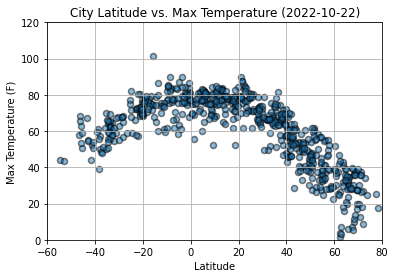

In [91]:
# x and y values
latitude = clean_city_data['Lat']
m_temp = clean_city_data['Max Temp']

# convert unix date value to yyyy-mm-dd
dt_converted = datetime.date.fromtimestamp(max(cities_df['Date']))

# scatter plot paramters
plt.scatter(latitude,m_temp,alpha=0.5,edgecolors='black',linewidths=1.5)
plt.grid()
plt.ylim(0,round((max(m_temp)+10)/20)*20)
plt.xlim((round((min(latitude)-10)/20)*20),(round((max(latitude)+10)/20)*20))
plt.title(f'City Latitude vs. Max Temperature ({dt_converted})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

# save figure as png
plt.savefig('output_data/lat_max_temp.png')
plt.show()


## Latitude vs. Humidity Plot

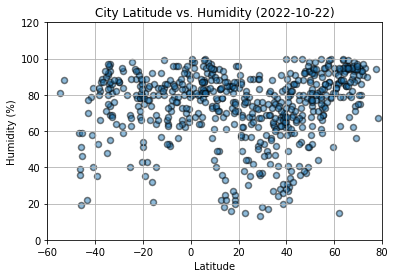

In [92]:
# y values
h_data = clean_city_data['Humidity']

# scatter plot parameters
plt.scatter(latitude,h_data,alpha=0.5,edgecolors='black',linewidths=1.5)
plt.grid()
plt.ylim(0,round((max(h_data)+10)/20)*20)
plt.xlim((round((min(latitude)-10)/20)*20),(round((max(latitude)+10)/20)*20))
plt.title(f'City Latitude vs. Humidity ({dt_converted})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# save figure to png
plt.savefig('output_data/lat_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

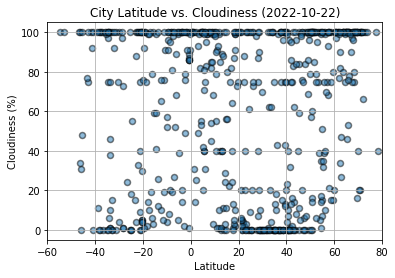

In [93]:
# y values
c_data = clean_city_data['Cloudiness']

# scatter plot parameters
plt.scatter(latitude,c_data,alpha=0.5,edgecolors='black',linewidths=1.5)
plt.grid()
plt.ylim(-5,105)
plt.xlim((round((min(latitude)-10)/20)*20),(round((max(latitude)+10)/20)*20))
plt.title(f'City Latitude vs. Cloudiness ({dt_converted})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# save figure to plt
plt.savefig('output_data/lat_clouds.png')
plt.show()

## Latitude vs. Wind Speed Plot

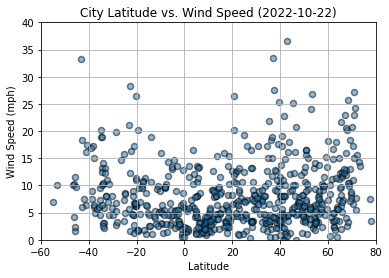

In [94]:
# y values
w_data = clean_city_data['Wind Speed']

# scatter plot parameters
plt.scatter(latitude,w_data,alpha=0.5,edgecolors='black',linewidths=1.5)
plt.grid()
plt.ylim(0,round((max(w_data)+5)/10)*10)
plt.xlim((round((min(latitude)-10)/20)*20),(round((max(latitude)+10)/20)*20))
plt.title(f'City Latitude vs. Wind Speed ({dt_converted})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

# save figure as png
plt.savefig('output_data/lat_wind.png')
plt.show()

## Linear Regression

In [95]:
# subset data for Northern Hemisphere
north_df = clean_city_data.loc[clean_city_data['Lat'] >= 0]
print(f'Northern Hemisphere cities: {len(north_df)}')
north_df.describe()

Northern Hemisphere cities: 434


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,4.340000e+02
mean,37.377445,10.887737,56.901705,73.488479,59.449309,7.966129,1.666487e+09
std,20.537584,87.464591,20.116542,20.121940,41.442728,5.845080,8.356901e+01
min,0.516700,-173.300000,1.530000,13.000000,0.000000,0.000000,1.666487e+09
25%,19.344950,-73.256100,40.345000,64.250000,12.250000,3.565000,1.666487e+09
50%,39.116700,19.802850,61.670000,78.000000,75.000000,6.520000,1.666487e+09
75%,54.401450,85.983350,74.757500,88.000000,100.000000,10.645000,1.666487e+09
max,78.218600,178.416700,89.620000,100.000000,100.000000,36.640000,1.666487e+09


In [96]:
# subset data for Northern Hemisphere
south_df = clean_city_data.loc[clean_city_data['Lat'] < 0]
print(f'Southern Hemisphere cities: {len(south_df)}')
south_df.describe()

Southern Hemisphere cities: 174


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,-20.996495,27.974616,69.150057,74.959770,61.793103,7.991667,1.666487e+09
std,13.635630,96.766200,10.813283,16.617547,40.996585,5.577463,7.453732e+01
min,-54.800000,-175.200000,39.200000,19.000000,0.000000,0.510000,1.666487e+09
25%,-33.446775,-56.576675,61.420000,66.000000,14.250000,4.380000,1.666487e+09
50%,-20.336250,21.653500,69.835000,80.000000,79.000000,6.410000,1.666487e+09
75%,-9.053275,127.488350,77.047500,86.750000,100.000000,10.325000,1.666487e+09
max,-0.130300,178.004200,101.320000,99.000000,100.000000,33.170000,1.666487e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.870988022577886


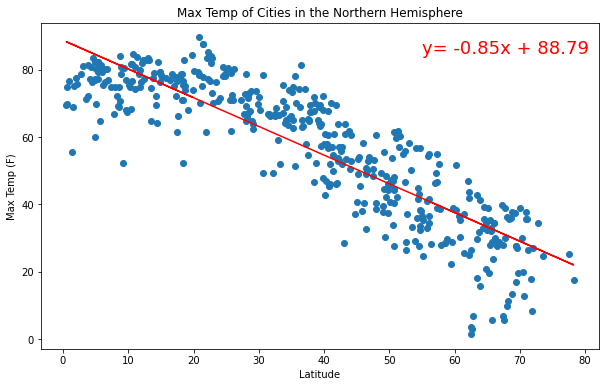

In [97]:
# x and y values
x = north_df['Lat']
y = north_df['Max Temp']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model
line = st.linregress(x,y)
y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'

# scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(55,85),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Max Temp of Cities in the Northern Hemisphere')

# save to png file
plt.savefig('output_data/north_lat_max_temp.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7382055425298523


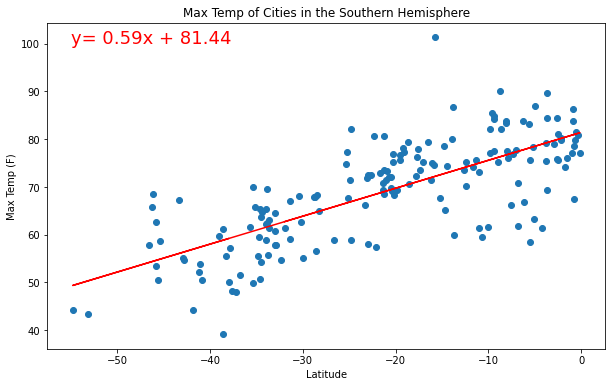

In [98]:
# x and y values
x = south_df['Lat']
y = south_df['Max Temp']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model
line = st.linregress(x,y)
y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'

# scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(-55,100),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Max Temp of Cities in the Southern Hemisphere')

# save to png file
plt.savefig('output_data/south_lat_max_temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19117965116964236


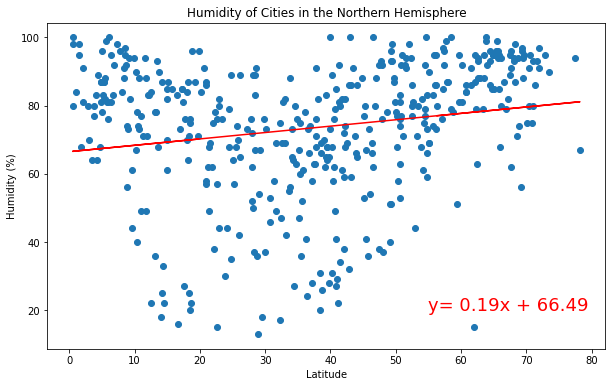

In [99]:
# x and y values
x = north_df['Lat']
y = north_df['Humidity']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model
line = st.linregress(x,y)
y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'

# scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(55,20),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity of Cities in the Northern Hemisphere')

# save to png file
plt.savefig('output_data/north_lat_humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17552782675595394


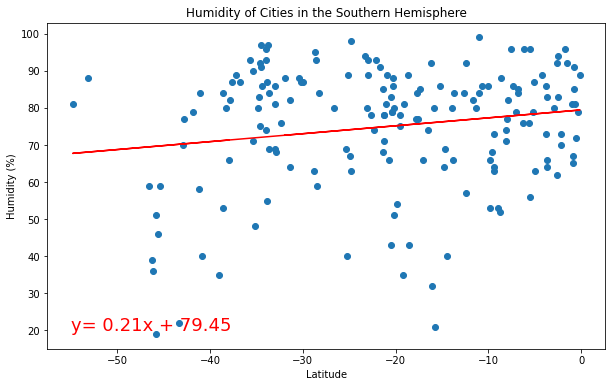

In [100]:
# x and y values
x = south_df['Lat']
y = south_df['Humidity']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model
line = st.linregress(x,y)
y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'

# scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(-55,20),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity of Cities in the Southern Hemisphere')

# save to png file
plt.savefig('output_data/south_lat_humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15241237330137206


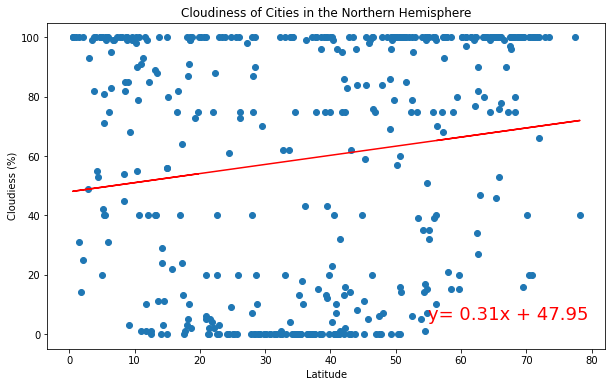

In [101]:
# x and y values
x = north_df['Lat']
y = north_df['Cloudiness']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model
line = st.linregress(x,y)
y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'

# scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(55,5),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiess (%)')
plt.title('Cloudiness of Cities in the Northern Hemisphere')

# save to png file
plt.savefig('output_data/north_lat_clouds.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08384537206333026


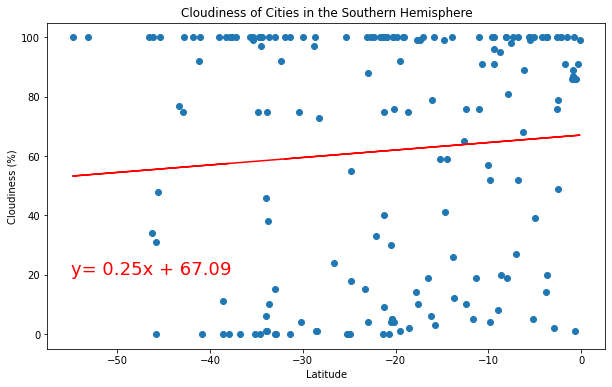

In [102]:
# x and y values
x = south_df['Lat']
y = south_df['Cloudiness']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model
line = st.linregress(x,y)
y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'

# scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(-55,20),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness of Cities in the Southern Hemisphere')

# save to png file
plt.savefig('output_data/south_lat_clouds.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.24652509771023218


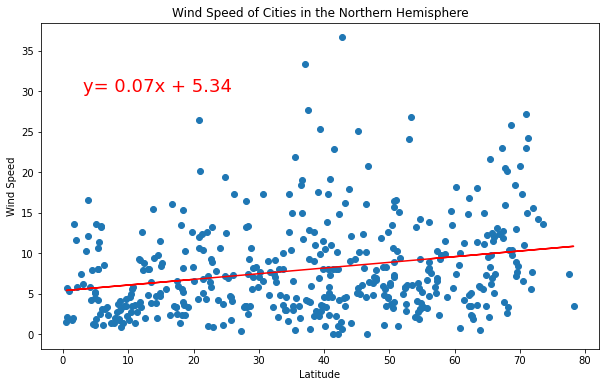

In [103]:
# x and y values
x = north_df['Lat']
y = north_df['Wind Speed']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model
line = st.linregress(x,y)
y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'

# scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(3,30),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed of Cities in the Northern Hemisphere')

# save to png file
plt.savefig('output_data/north_lat_wind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.28003945765614546


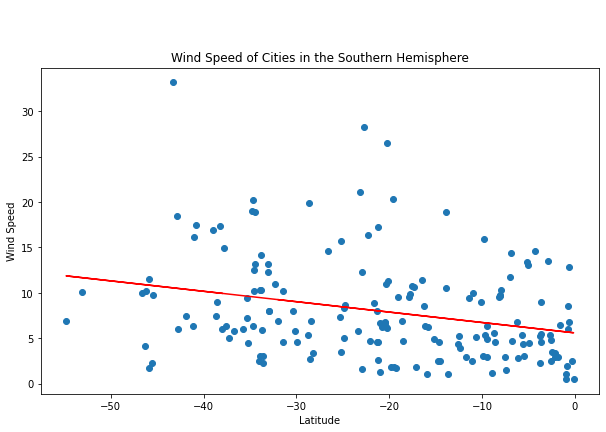

In [104]:
# x and y values
x = south_df['Lat']
y = south_df['Wind Speed']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model
line = st.linregress(x,y)
y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'

# scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(-15,40),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed of Cities in the Southern Hemisphere')

# save to png file
plt.savefig('output_data/south_lat_wind.png')
plt.show()